# Simple One Layer Neural Network in Python

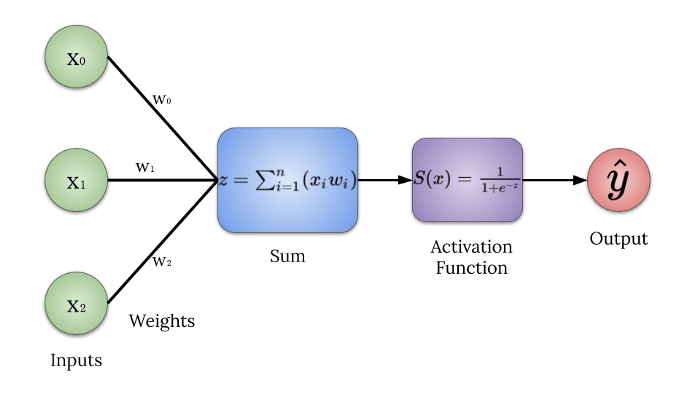

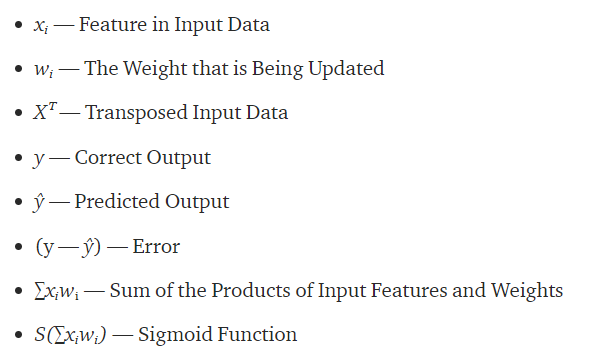

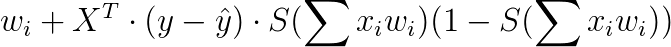

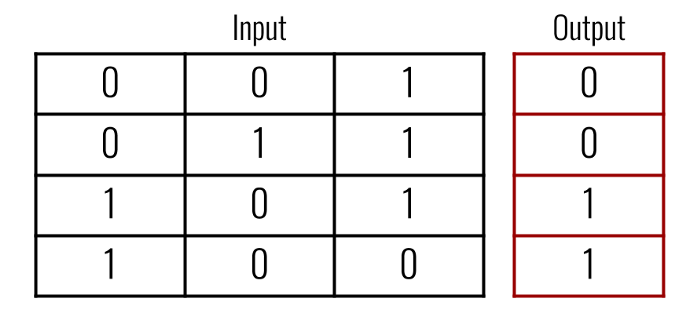

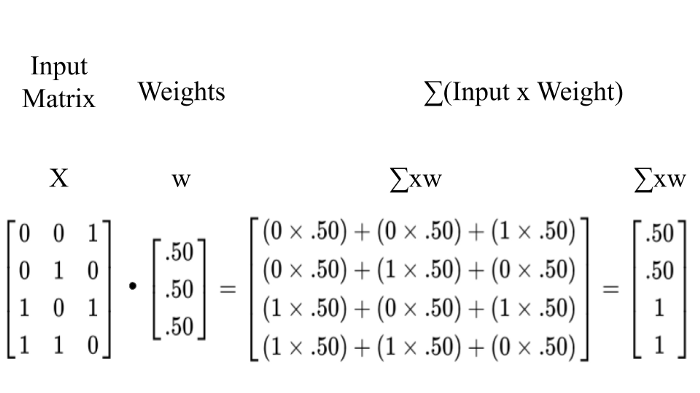

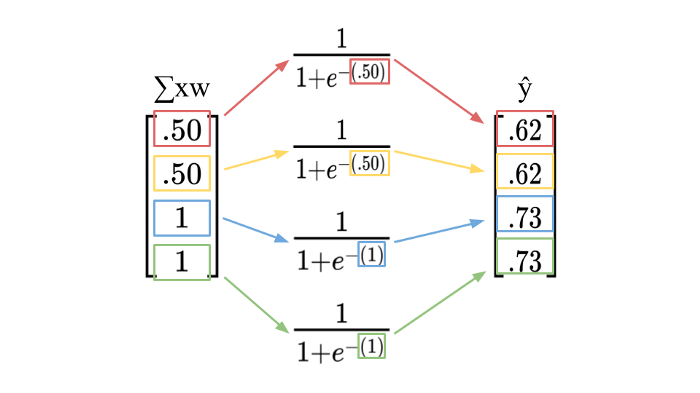

#### Source: https://towardsdatascience.com/inroduction-to-neural-networks-in-python-7e0b422e6c24

#### Packages Required

In [30]:
import numpy as np # helps with the math
import matplotlib.pyplot as plt # to plot error during training

#### Input Data for training NN

In [31]:
inputs = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])

#### Output Data for training NN

In [32]:
outputs = np.array([[0], [0], [0], [1], [1], [1]])

#### Define Neural Network

In [33]:
class NeuralNetwork:
    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]]) 
        # initialize weights randomly
        # self.weights = np.random.rand(self.inputs.shape[1]) 
        self.error_history = []
        self.iteration_list = []
    
    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        #XW = np.dot(self.inputs, self.weights)
        #y^ = sigmoid(XW) = 1/1+exp(-XW)
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        #Error = y-y^ 
        self.error  = self.outputs - self.hidden
        #Derivatives = Sigmoid derivation = sigmoid(y^)*(1-sigmoid(y^)) 
        #delta = Error * derivatives
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        #Updated weightd = weights + X^T*Delta 
        self.weights += np.dot(self.inputs.T, delta)
        
    # train the neural net for 1500 iterations
    def train(self, iterations=1500):
        for iteration in range(iterations):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.iteration_list.append(iteration)
    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

#### Train Neural Network

In [34]:
NN = NeuralNetwork(inputs, outputs)
NN.train()

#### Create two samples for prediction

In [35]:
Sample_1 = np.array([[1, 1, 0]]) #Output 1
Sample_2 = np.array([[0, 1, 1]]) #output 0

#### Predict output for two samples

In [36]:
print(NN.predict(Sample_1))
print(NN.predict(Sample_2))

[[0.9617923]]
[[0.02699935]]


#### Error plot over the entire training duration

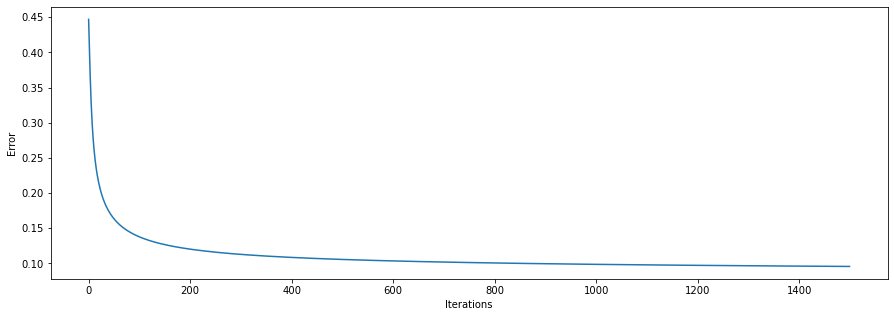

In [37]:
# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.iteration_list, NN.error_history)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()